# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
# Shape of training and test sets
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [3]:
# Image dimensions
image_height = x_train.shape[1]
image_width = x_train.shape[2]
num_channels = x_train.shape[3]
print(f"Image dimensions: {image_height}x{image_width} pixels, {num_channels} channels")

Image dimensions: 32x32 pixels, 3 channels


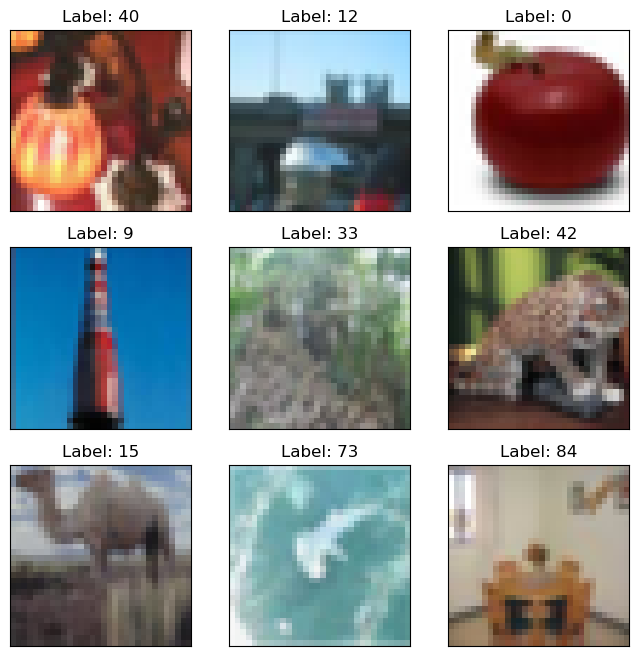

In [4]:
import matplotlib.pyplot as plt
import numpy as np

random_indices = np.random.choice(len(x_test), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[random_indices[i]], interpolation='nearest')
    ax.set_title(f"Label: {y_test[random_indices[i]][0]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your code here
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# normalizing images
x_train = x_train / 255.0
x_test = x_test / 250.0

# one-hot encoding
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# split training set into training and validation 
X_training, X_validation, y_training, y_validation = train_test_split(
    x_train, # normzlized images
    y_train, # one_hot labels
    test_size=0.2, # 20% of the data is used for testing
    random_state=42 # Providing a value here means getting the same "random" split every time
)

print ("X Orignal trian:", x_train.data.shape)
print ("Y Original trian:", y_train.data.shape)
print ("----------------------------------------")
print ("X training:", X_training.data.shape)
print ("Y training:", y_training.data.shape)
print ("X validation: ", X_validation.data.shape)
print ("Y validation: ", y_validation.data.shape)


X Orignal trian: (50000, 32, 32, 3)
Y Original trian: (50000, 100)
----------------------------------------
X training: (40000, 32, 32, 3)
Y training: (40000, 100)
X validation:  (10000, 32, 32, 3)
Y validation:  (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
import tensorflow as tf
from tensorflow.keras import layers, models

# Create the CNN model
model = models.Sequential()

# Convolutional layer with 32 filters, kernel size of (3, 3), ReLU activation, and ‘same’ padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Max pooling layer with pool size (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, kernel size of (3, 3), ReLU activation, and ‘same’ padding
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# Max pooling layer with pool size (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to convert 2D feature maps to a 1D vector
model.add(layers.Flatten())

# Dense layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Output layer with 100 units (one for each class) and softmax activation.
model.add(layers.Dense(100, activation='softmax'))  # 100 classes in CIFAR-100


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b>
    - The assignment is for a multi-class classification tasks (CIFAR-100 dataset).
    - The categorical cross-entropy loss function is commonly used because it encourages the model to assign high probabilities to the correct class.

- <b>Optimizer:</b>
    - The 'adam' optimizer is a popular choice for training neural networks.

In [7]:
from keras import optimizers

# Your code here
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [8]:
# Your code here
# 
# Epochs = how many times the entire training dataset is passed through the model during training.

# Train the model
''' 
epochs = 5 
batch_size = 32
history = model.fit(X_training, y_training, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, y_validation))
'''


' \nepochs = 5 \nbatch_size = 32\nhistory = model.fit(X_training, y_training, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, y_validation))\n'

In [9]:
# Train the model
'''
epochs = 10
batch_size = 32
history = model.fit(X_training, y_training, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, y_validation))
'''

'\nepochs = 10\nbatch_size = 32\nhistory = model.fit(X_training, y_training, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, y_validation))\n'

In [10]:
# Epochs = how many times the entire training dataset is passed through the model during training.

# Train the model

epochs = 15
batch_size = 32
history = model.fit(X_training, y_training, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, y_validation))


Epoch 1/15
1250/1250 [==============================] - 39s 30ms/step - loss: 3.7747 - accuracy: 0.1292 - val_loss: 3.2473 - val_accuracy: 0.2144
Epoch 2/15
1250/1250 [==============================] - 28s 23ms/step - loss: 3.0402 - accuracy: 0.2562 - val_loss: 2.9473 - val_accuracy: 0.2829
Epoch 3/15
1250/1250 [==============================] - 27s 21ms/step - loss: 2.6790 - accuracy: 0.3282 - val_loss: 2.7626 - val_accuracy: 0.3186
Epoch 4/15
1250/1250 [==============================] - 30s 24ms/step - loss: 2.4428 - accuracy: 0.3755 - val_loss: 2.6706 - val_accuracy: 0.3398
Epoch 5/15
1250/1250 [==============================] - 33s 26ms/step - loss: 2.2553 - accuracy: 0.4167 - val_loss: 2.6181 - val_accuracy: 0.3553
Epoch 6/15
1250/1250 [==============================] - 49s 39ms/step - loss: 2.0982 - accuracy: 0.4528 - val_loss: 2.6064 - val_accuracy: 0.3586
Epoch 7/15
1250/1250 [==============================] - 54s 44ms/step - loss: 1.9484 - accuracy: 0.4852 - val_loss: 2.6489 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b>
    - 0.6958 (with 15 epochs)
- <b>Other metric:</b> 
    - val_loss
- <b>Reason for selection:</b>
    - `val_loss` is the validation loss on a separate validation dataset. High values may indicate overfitting.
- <b>Value of metric:</b>
    - 3.5273 
- <b>Interpretation of metric value:</b> 
    - Comparing epoch 10 to 15:
        - there was no big gain observing accuracy
        - validation loss increased significatly showing a potential over fitting.

In [11]:
# Your code here

# Evaluate Precision on validation set
from sklearn.metrics import precision_score

val_predictions = model.predict(X_validation)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(y_validation, axis=1)
precision = precision_score(val_true_classes, val_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")



313/313 [==============================] - 3s 8ms/step
Precision: 0.3605


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

    - The plot shows how the model behave with the training and validation data sets.
    - The validation set represents the new information never "saw" by the model before.
    - The plot also shows that, the model started ok, but after some epochs it becase over fitted (distance between blue and orange graphics)

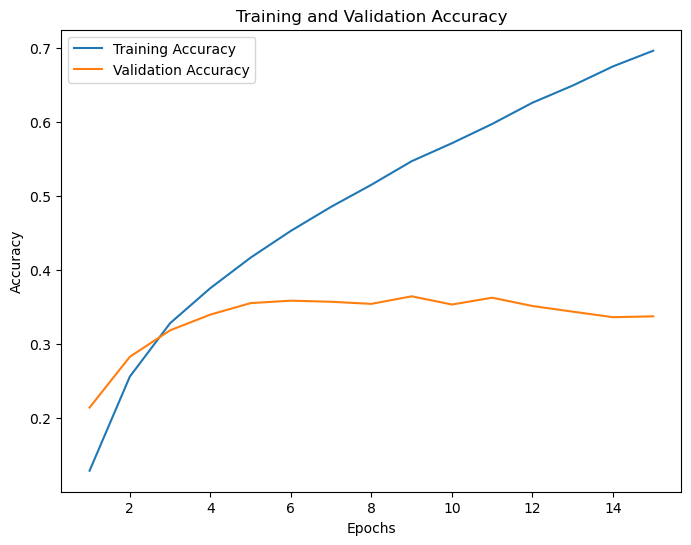

In [12]:
# Your code here
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [13]:

correct_indices = np.where(np.argmax(model.predict(x_test), axis=1) == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(np.argmax(model.predict(x_test), axis=1) != np.argmax(y_test, axis=1))[0]

correct_image = x_test[correct_indices[0]]
correct_image_label = y_test[correct_indices[0]][0]

incorrect_image = x_test[incorrect_indices[0]]
incorrect_image_label = y_test[incorrect_indices[0]][0]


313/313 [==============================] - 3s 8ms/step


1/1 [==============================] - 0s 62ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


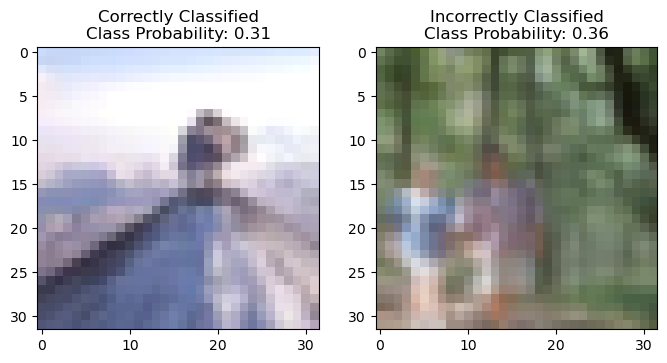

In [14]:
correct_probabilities = model.predict(np.expand_dims(correct_image, axis=0))
incorrect_probabilities = model.predict(np.expand_dims(incorrect_image, axis=0))

plt.figure(figsize=(8, 8))

# Plot the correct image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified\nClass Probability: {correct_probabilities.max():.2f}')

# Plot the incorrect image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified\nClass Probability: {incorrect_probabilities.max():.2f}')

plt.show()

In [15]:
'''
The accuray plot:
- The accuracy plot show an increasing trend for both training and validation accuracy. 
- If validation accuracy starts decreasing while training accuracy continues to increase, it may indicate overfitting.

Classification Probability
- The classification probabilities will give insights into how confident the model is in its predictions.

Image Classification
- The top predicted class should have a high probability.
- When the model misclassify an image, the top predicted class have a lower probability indicating uncertainty.
'''

'\nThe accuray plot:\n- The accuracy plot show an increasing trend for both training and validation accuracy. \n- If validation accuracy starts decreasing while training accuracy continues to increase, it may indicate overfitting.\n\nClassification Probability\n- The classification probabilities will give insights into how confident the model is in its predictions.\n\nImage Classification\n- The top predicted class should have a high probability.\n- When the model misclassify an image, the top predicted class have a lower probability indicating uncertainty.\n'

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [16]:
# Your code here

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill missing pixels with the nearest value
)


In [17]:
'''
- I chose data augmentation because it’s a powerful technique to improve performance without collecting additional real-world data.
- Data augmentation introduces randomness during training by applying transformations like rotation, shifting, shearing, zooming, and flipping to the input images.
- By exposing the model to these variations, it learns to be more robust and generalizes better to unseen data.
- The hyperparameters (e.g., rotation range, shift range) were set based on common values used in practice (copied from internet examples ;) )
'''

'\n- I chose data augmentation because it’s a powerful technique to improve performance without collecting additional real-world data.\n- Data augmentation introduces randomness during training by applying transformations like rotation, shifting, shearing, zooming, and flipping to the input images.\n- By exposing the model to these variations, it learns to be more robust and generalizes better to unseen data.\n- The hyperparameters (e.g., rotation range, shift range) were set based on common values used in practice (copied from internet examples ;) )\n'

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [18]:
# Your code here

# Fit the generator to your training data
datagen.fit(X_training)

# Train the model using the augmented data
history_augmented = model.fit(datagen.flow(X_training, y_training, batch_size=batch_size),
                              epochs=15,
                              validation_data=(X_validation, y_validation))

Epoch 1/15
1250/1250 [==============================] - 69s 55ms/step - loss: 2.8439 - accuracy: 0.2996 - val_loss: 2.6011 - val_accuracy: 0.3509
Epoch 2/15
1250/1250 [==============================] - 71s 57ms/step - loss: 2.6420 - accuracy: 0.3301 - val_loss: 2.5683 - val_accuracy: 0.3577
Epoch 3/15
1250/1250 [==============================] - 94s 75ms/step - loss: 2.5749 - accuracy: 0.3440 - val_loss: 2.5339 - val_accuracy: 0.3613
Epoch 4/15
1250/1250 [==============================] - 71s 57ms/step - loss: 2.5177 - accuracy: 0.3596 - val_loss: 2.4778 - val_accuracy: 0.3711
Epoch 5/15
1250/1250 [==============================] - 84s 67ms/step - loss: 2.4778 - accuracy: 0.3666 - val_loss: 2.4060 - val_accuracy: 0.3904
Epoch 6/15
1250/1250 [==============================] - 75s 60ms/step - loss: 2.4462 - accuracy: 0.3723 - val_loss: 2.4500 - val_accuracy: 0.3773
Epoch 7/15
1250/1250 [==============================] - 79s 63ms/step - loss: 2.4217 - accuracy: 0.3763 - val_loss: 2.4393 -

In [19]:
# 'loss': The training loss (error) at the end of each epoch.
# 'val_loss': The validation loss (error) at the end of each epoch (if validation data is provided).

print("Training loss (original model)  :", min(history.history['loss']))
print("Validation loss (original model):", min(history.history['val_loss']))

# history_augmented
print ('--------------------------------------------------------')
print("Training loss (augumented model)  :", min(history_augmented.history['loss']))
print("Validation loss (augumented model):", min(history_augmented.history['val_loss']))

Training loss (original model)  : 1.0568063259124756
Validation loss (original model): 2.6063880920410156
--------------------------------------------------------
Training loss (augumented model)  : 2.2714154720306396
Validation loss (augumented model): 2.3418898582458496


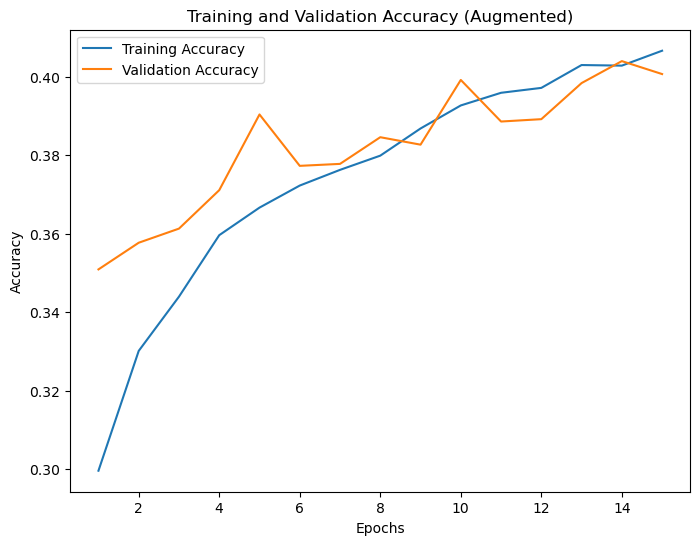

In [20]:
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_acc = history_augmented.history['accuracy']
val_acc = history_augmented.history['val_accuracy']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Augmented)')
plt.legend()
plt.show()

1/1 [==============================] - 0s 51ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


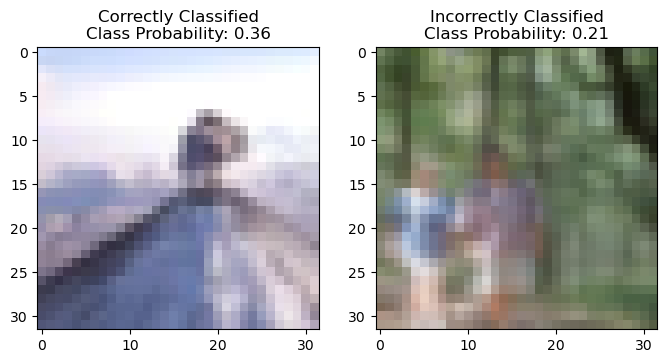

In [21]:
correct_probabilities = model.predict(np.expand_dims(correct_image, axis=0))
incorrect_probabilities = model.predict(np.expand_dims(incorrect_image, axis=0))

plt.figure(figsize=(8, 8))

# Plot the correct image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified\nClass Probability: {correct_probabilities.max():.2f}')

# Plot the incorrect image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified\nClass Probability: {incorrect_probabilities.max():.2f}')

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

I planned to use `augmentation` to improve performance without collecting additional real-world data.
Using the augumentation technique, in fact, deteriorated the performance of the model. The training loss jumped from ~1 to ~2. 
The 'Training and Validation Accuracy (Augmented)' graphic shows the over fitting caused by `augumentation`.

`Dropout` technique prevents overfitting by reducing reliance on specific neurons.
To balance/compensate the over fitting effect of the `augumentation` technique, in the future, I could use `Dropout`. 


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `23:59 PM - 03/08/2024`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.